In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_index = pd.read_csv("economic_data.csv")

In [3]:
df_index.head(5)

,year,month,interest_rate,unemployment_rate,index_price
0,1924,1,3.50,5.19,534.714897
1,1925,1,2.86,4.36,424.911412
2,1926,1,3.65,5.18,582.253910
3,1927,1,4.52,5.81,784.797318
4,1928,1,2.77,5.07,321.169866


In [9]:
## drop unnnecessary columns
df_index.drop(columns=['month', 'year'], axis = 1, inplace= True)

In [11]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,3.50,5.19,534.714897
1,2.86,4.36,424.911412
2,3.65,5.18,582.253910
3,4.52,5.81,784.797318
4,2.77,5.07,321.169866


In [16]:

df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [17]:
## lets do some visualization
import seaborn as sns
sns.pairplot(df_index)

In [20]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,0.014553,0.890899
unemployment_rate,0.014553,1.000000,-0.441184
index_price,0.890899,-0.441184,1.000000


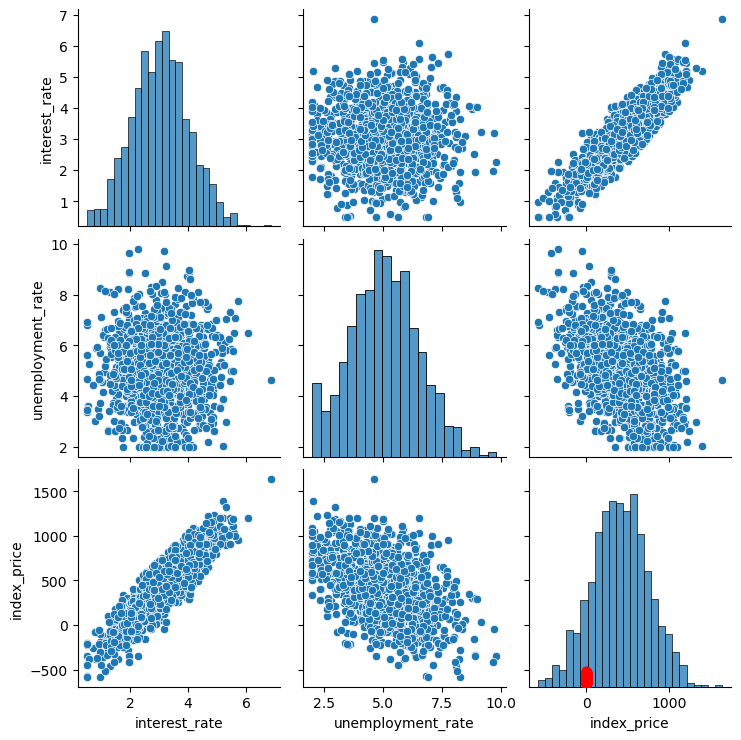

In [22]:
## visualization the datapoints more closely
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'],color = 'red')
plt.xlabel("Interest Rate")
plt.ylabel("unemployment Ratio")
plt.show()

In [23]:
## independent and dependednt features
X = df_index.iloc[::-1]
y = df_index.iloc[:,-1]

In [24]:
X.head()

,interest_rate,unemployment_rate,index_price
1199,4.36,5.10,810.947961
1198,3.22,5.31,435.166468
1197,3.55,3.49,731.564473
1196,2.98,3.62,541.022220
1195,3.44,2.83,767.901200


In [25]:
## train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state= 42)

In [26]:
import seaborn as sns

In [32]:
sns.regplot(df_index['index_price'],df_index['interest_rate'])

TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given

In [33]:
from sklearn.preprocessing import StandardScaler


In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

TypeError: float() argument must be a string or a real number, not 'StandardScaler'

In [39]:
X_train

StandardScaler()

In [40]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [41]:
regression.fit(X_train,y_train)

ValueError: Expected 2D array, got scalar array instead:
array=StandardScaler().
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [43]:
from sklearn.model_selection import cross_val_score
cross_val_score(regression,X_train, y_train, scoring = "neg_mean_squared_error", cv=3)

InvalidParameterError: The 'X' parameter of cross_val_score must be an array-like or a sparse matrix. Got StandardScaler() instead.